# Enunciado

Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a
relação entre os dados de colesterol e peso com a incidência de problemas que
influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos
seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e
tratamento para esses tipos de causa, a operadora quer realizar um estudo para
identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar
medidas preventivas e palestras de cuidados médicos. Para isso, a operadora conta com
a equipe de arquiteto de big data para 1juda-los a encontrar o grupo de risco dentre
essas pessoas. Através da análise dos dados, os analistas da operadora de seguro de
saúde identificaram 4 grandes grupos:

1. Alto Risco
2. Risco Moderado alto
3. Risco Moderado baixo
4. Baixo risco

## Atividade

Atividades
Os alunos deverão desempenhar as seguintes atividades:
1. Criar um projeto no Google Drive.
2. Coletar e analisar os dados dos seguintes datasets:
a. dados_clientes
b. estados_brasileiros
c. idade_clientes
3. Manipular dados e corrigir erros se necessário;
4. Implementar algoritmo não supervisionado Kmeans;
5. Criar agrupamento para 4 grupos distintos;
6. Responder as questões teóricas e práticas do trabalho.

In [ ]:
import pandas as pd

# Idade

In [ ]:
dataset = "https://raw.githubusercontent.com/ProfLeandroLessa/desafio-M1-ABD/master/datasets/idade_clientes.csv"
idade = pd.read_csv(dataset, sep = ";")
#idade.head()
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

# Estado

In [ ]:
path = "https://raw.githubusercontent.com/ProfLeandroLessa/desafio-M1-ABD/master/datasets/estados_brasileiros.csv"
#estados = pd.read_csv("estados_brasileiros.csv", sep=",")
estados = pd.read_csv(path, encoding='latin1', sep=";")
estados.sigla_estado = estados.sigla_estado.str.upper()
#estados.head(10)
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
estados.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     id_estado  estado  sigla_estado   pais
0       False   False         False  False
1       False   False         False  False
2       False   False         False  False
3       False   False         False  False
4       False   False         False  False
5       False   False         False  False
6       False   False         False  False
7       False   False         False  False
8       False   False         False  False
9       False   False         False  False
10      False   False         False  False
11      False   False         False  False
12      False   False         False  False
13      False   False         False  False
14      False   False         False  False
15      False   False         False  False
16      False   False         False  False
17      False   False         False   True
18      False   False         False  False
19      False   False         False  False
20      False   False         False

## Substituição de Variáveis categóricas

In [ ]:
# incluindo brasil nos faltantes
#estados.pais.fillna("Brasil", inplace=True)
#dropando os dados faltantes
estados.dropna(inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [ ]:
estados.sigla_estado.unique()

array(['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT',
       'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'RJ', 'RN', 'RS', 'RO', 'RR',
       'SP', 'SE', 'TO'], dtype=object)

In [ ]:
#estados = estados.drop(['estado', 'pais'], axis=1)

In [ ]:
estados.head(10)

,id_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil
1,2,Alagoas,AL,Brasil
2,3,Amapá,AP,Brasil
3,4,Amazonas,AM,Brasil
4,5,Bahia,BA,Brasil
5,6,Ceará,CE,Brasil
6,7,Distrito Federal,DF,Brasil
7,8,Espírito Santo,ES,Brasil
8,9,Goiás,GO,Brasil
9,10,Maranhão,MA,Brasil


# Dados Clientes

In [ ]:
clientes = pd.read_excel("dados_clientes.xlsx")

#clientes.head()
clientes.info()
#clientes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.loc[clientes.peso.isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [ ]:
clientes.dropna(inplace=True)
#clientes.dropna(subset=['peso', inplace = True])
#preencher valores ausentes com a média ->   clientes.peso.fillna(round(media,2), inplace=True)

In [ ]:
#clientes.info()
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


## Analisando os dados com plot

In [ ]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe02956afd0>]],
      dtype=object)

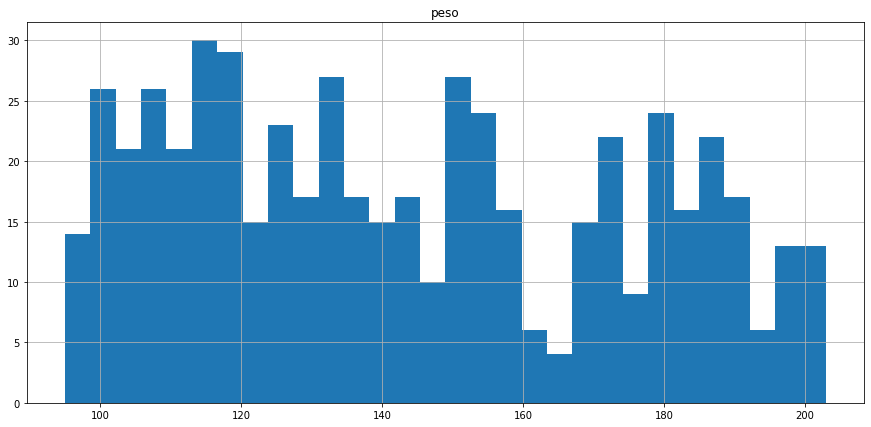

In [ ]:
clientes.hist(column = 'peso', figsize=(15,7), bins=30)

## Criando a variavel de genero

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
clientes['genero_number'] = LE.fit_transform(clientes['genero'])
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


# Dados completos - Junção

In [ ]:
df = pd.merge(clientes, estados, on="id_estado")
df = pd.merge(df, idade, on="id_cliente").sort_values('id_cliente')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 100
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_cliente     498 non-null    int64  
 1   peso           498 non-null    float64
 2   colesterol     498 non-null    int64  
 3   genero         498 non-null    object 
 4   id_estado      498 non-null    int64  
 5   genero_number  498 non-null    int64  
 6   estado         498 non-null    object 
 7   sigla_estado   498 non-null    object 
 8   pais           498 non-null    object 
 9   idade          498 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 42.8+ KB


In [ ]:
df.drop("id_estado", axis=1, inplace=True)

In [ ]:
#df.sort_values(by=['id_cliente'])
df.head()

,id_cliente,peso,colesterol,genero,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,1,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,1,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,1,Espírito Santo,ES,Brasil,17


In [ ]:
df.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,1,Roraima,RR,Brasil,17
1,2,115.0,135,Masculino,1,Distrito Federal,DF,Brasil,28
2,3,115.0,136,Masculino,1,Amazonas,AM,Brasil,62
3,5,130.0,158,Masculino,1,Sergipe,SE,Brasil,44
4,6,198.0,227,Masculino,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,1,Rondônia,RO,Brasil,20
494,544,129.0,157,Masculino,1,Acre,AC,Brasil,66
495,545,107.0,115,Masculino,1,Ceará,CE,Brasil,36
496,546,117.0,147,Masculino,1,Rio Grande do Norte,RN,Brasil,57


In [ ]:
df.describe()

,id_cliente,peso,colesterol,genero_number,idade
count,498.000000,498.000000,498.000000,498.000000,498.000000
mean,274.012048,143.668675,170.481928,0.518072,42.875502
std,158.916109,31.008804,39.370099,0.500176,15.066872
min,1.000000,95.000000,102.000000,0.000000,16.000000
25%,135.250000,116.000000,136.000000,0.000000,30.250000
50%,276.500000,140.000000,169.000000,1.000000,42.000000
75%,411.750000,171.750000,208.000000,1.000000,55.750000
max,547.000000,203.000000,235.000000,1.000000,70.000000


# Alterando a disposição da coluna

In [ ]:
df[['id_cliente', 'peso', 'colesterol', 'genero', 'idade', 'sigla_estado']]

,id_cliente,peso,colesterol,genero,idade,sigla_estado
0,1,102.0,111,Masculino,17,RR
17,2,115.0,135,Masculino,28,DF
39,3,115.0,136,Masculino,62,AM
64,5,130.0,158,Masculino,44,SE
83,6,198.0,227,Masculino,17,ES
...,...,...,...,...,...,...
418,543,172.0,207,Masculino,20,RO
430,544,129.0,157,Masculino,66,AC
155,545,107.0,115,Masculino,36,CE
372,546,117.0,147,Masculino,57,RN


In [ ]:
df = df[['id_cliente', 'peso', 'colesterol', 'genero', 'idade', 'sigla_estado']].reset_index(drop=True)

In [ ]:
df

,id_cliente,peso,colesterol,genero,idade,sigla_estado
0,1,102.0,111,Masculino,17,RR
1,2,115.0,135,Masculino,28,DF
2,3,115.0,136,Masculino,62,AM
3,5,130.0,158,Masculino,44,SE
4,6,198.0,227,Masculino,17,ES
...,...,...,...,...,...,...
493,543,172.0,207,Masculino,20,RO
494,544,129.0,157,Masculino,66,AC
495,545,107.0,115,Masculino,36,CE
496,546,117.0,147,Masculino,57,RN


#Análise de Dados 

In [ ]:
import numpy as np
import plotly.express as px # criação de gréficos dinâmicos
import plotly.graph_objects as go # Para criação e concatenização de gráficos
from sklearn.preprocessing import StandardScaler # realizar a padronização
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dados_cliente) 
    wcss.append(kmeans.inertia_) 
  return wcss

In [ ]:
dados_cliente = df[['peso', 'colesterol']]

In [ ]:
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [ ]:
wcss_clientes = calcular_wcss(dados_cliente)

In [ ]:
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de wcss {wcss_clientes[i]}')

O cluster 0 possui valor de wcss 1248240.6686746986
O cluster 1 possui valor de wcss 298932.7377352369
O cluster 2 possui valor de wcss 127842.60787249672
O cluster 3 possui valor de wcss 73809.93553059456
O cluster 4 possui valor de wcss 49068.8738718445
O cluster 5 possui valor de wcss 34064.50002100837
O cluster 6 possui valor de wcss 25079.92393550797
O cluster 7 possui valor de wcss 20378.05126656164
O cluster 8 possui valor de wcss 16003.657266380145
O cluster 9 possui valor de wcss 13385.38391038145


# Visualização Gráfico de cotovelo

In [ ]:
import plotly.express as px # criação de grafico dinâmico
import plotly.offline as py
import plotly.graph_objects as go # Para criação a concatenização de gráficos

In [ ]:
grafico_wcss = px.line(x = range(1, 11), y=wcss_clientes)
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o Wcss', xaxis_title = 'Numero de Clusters',
yaxis_title = 'Valor de Wcss',
template = 'plotly_white'
)

fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
df.head()

,id_cliente,peso,colesterol,genero,idade,sigla_estado,cluster
0,1,102.0,111,Masculino,17,RR,2
1,2,115.0,135,Masculino,28,DF,2
2,3,115.0,136,Masculino,62,AM,2
3,5,130.0,158,Masculino,44,SE,1
4,6,198.0,227,Masculino,17,ES,0


## Calculo dos centroides de cada cluster

In [ ]:
centroides_cluster= kmeans_clientes.cluster_centers_  
centroides_cluster

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [ ]:
grafico= px.scatter(x = df['peso'], 
y = df['colesterol'], 
color = df['cluster'])

grafico_centroide= px.scatter(x = centroides_cluster[:,0], y = centroides_cluster[:,1], size = [8,8,8,8])
grafico_final= go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()

In [ ]:
grafico = px.scatter(x = df['colesterol'], 
y = df['peso'], 
color = df['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title = 'Análise de Clusters',
xaxis_title = 'Colesterol',
yaxis_title = 'peso')
fig.show()

In [ ]:
def plotar_grafico(x, y, xlabel, y_label):
	grafico = px.scatter(x = x, y = y, color = df['cluster'])
	fig = go.Figure(grafico)
	fig.update_layout(title = 'Análise de Clusters',
	xaxis_title = xlabel,
	yaxis_title = y_label)
	fig.show()

In [ ]:
plotar_grafico(df['colesterol'], df['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico(df['peso'], df['colesterol'], 'peso', 'colesterol')

In [ ]:
plotar_grafico(df['idade'], df['colesterol'], 'idade', 'colesterol')

## Segmentando os clientes baseado na análise dos clusters
Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.
vamos agrupar em 3 tipos:
1. Alto Risco
2. Risco Moderado alto
3. Risco Moderado baixo
4. Baixo risco

In [ ]:
x = 'colesterol'
y = 'peso'

plotar_grafico(df[x], df[y], x, y)

In [ ]:
cluster_clientes = df

# Incluindo as classificações no dataframe

In [ ]:
# Seguimentando os clientes baseado na análise dos clusters

cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'Risco Moderado Alto'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Baixo risco'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Risco Moderado Baixo'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'


In [ ]:
cluster_clientes

,id_cliente,peso,colesterol,genero,idade,sigla_estado,cluster,nome_cluster
0,1,102.0,111,Masculino,17,RR,2,Baixo risco
1,2,115.0,135,Masculino,28,DF,2,Baixo risco
2,3,115.0,136,Masculino,62,AM,2,Baixo risco
3,5,130.0,158,Masculino,44,SE,1,Risco Moderado Baixo
4,6,198.0,227,Masculino,17,ES,0,Alto Risco
...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,20,RO,0,Alto Risco
494,544,129.0,157,Masculino,66,AC,1,Risco Moderado Baixo
495,545,107.0,115,Masculino,36,CE,2,Baixo risco
496,546,117.0,147,Masculino,57,RN,1,Risco Moderado Baixo


Análises dos clusters criados

In [ ]:
# verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado Alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado Baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [ ]:
# verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['sigla_estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,142,25,RS,10
Baixo risco,129,25,AM,10
Risco Moderado Alto,106,25,PE,7
Risco Moderado Baixo,121,25,SE,9


In [ ]:
# verifica os valores de idade por cluster
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  185.983333   8.032754  168.0  180.00   
                     Masculino   82.0  183.109756  10.743940  167.0  173.25   
Baixo risco          Feminino    58.0  108.396552   6.472451   96.0  104.00   
                     Masculino   71.0  105.690141   5.953610   95.0  101.50   
Risco Moderado Alto  Feminino    59.0  152.135593   7.300112  140.0  145.00   
                     Masculino   47.0  152.553191   6.730232  140.0  148.00   
Risco Moderado Baixo Feminino    63.0  129.317460   7.079788  116.0  125.00   
                     Masculino   58.0  125.672414   6.383608  115.0  120.25   

                                  50%     75%    max  
nome_cluster         genero                           
Alto Risco           Feminino   186.0  192.00  203.0  
                     Masculino  182.0  189.75  203.0  
Baixo risco          Feminino   110.0  113.00  118.0  
                     Masculino  105.0  110.00  118.0  
Risco Moderado Alto  Feminino   154.0  157.00  169.0  
                     Masculino  151.0  154.50  168.0  
Risco Moderado Baixo Feminino   129.0  135.00  142.0  
                     Masculino  125.5  131.00  140.0

In [ ]:
cluster_clientes.query("nome_cluster == 'Alto Risco'").describe()

,id_cliente,peso,colesterol,idade,cluster
count,142.000000,142.000000,142.000000,142.000000,142.0
mean,270.746479,184.323944,218.985915,43.204225,0.0
std,155.081879,9.764278,8.086400,15.208965,0.0
min,6.000000,167.000000,204.000000,16.000000,0.0
25%,143.250000,176.250000,213.000000,32.000000,0.0
50%,268.500000,184.000000,220.000000,42.500000,0.0
75%,389.750000,191.000000,225.000000,56.000000,0.0
max,543.000000,203.000000,235.000000,69.000000,0.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado Alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Baixo risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado Alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado Baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Baixo risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado Alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Risco Moderado Baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0

In [ ]:
# Salvando o arquivo em csv 

In [ ]:
cluster_clientes.to_csv("classificacao_clientes.csv", sep=";", encoding='latin1')